In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
%matplotlib notebook
from Ellipse import *
from MCE import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mp
import matplotlib.cm as cm

from math import atan, cos, sin, pi

from pychebfun import *

from E3PNT.poly_function import *
from E3PNT.e3pnt import *

In [3]:
E1 = Ellipse(1.2, 0.8, 0, 0)
E2 = Ellipse(1.1, 0.9, 0.7, 0.7)

xs = [-0.2, 1, 2.1]
ys = [0, 1.5, 0]
n=3

In [4]:
def setop(ax):
    ax.set_aspect('equal')
    ax.set_xlim(-2.5, 3.7)
    ax.set_ylim(-1.5, 2.6)
    ax.axis('off')

def ppoints(ax=None):
    if ax is None:
        ax=plt.gca()
    setop(ax)
    ax.scatter(xs, ys, s=30)

    
def pell_from_points(ax=None):
    if ax is None:
        ax=plt.gca()
    setop(ax)
    E=[mp.patches.Ellipse([xs[i], ys[i]], E1.a * 2, E1.b * 2, fill=False) for i in range(n)]
    for e in E:
        ax.add_artist(e)
colors=[cm.hot(0.1), cm.hot(0.2), cm.hot(0.5), cm.hot(0.8)]

def pell_mce1(ax=None):
    if ax is None:
        ax=plt.gca()
    setop(ax)
    zs = MCE1(xs, ys, E1);
    colors=[cm.hot(0.1), cm.hot(0.2), cm.hot(0.5), cm.hot(0.8)]
    
    print(colors)
    seen = []

    for z in zs:
        ok=True

        for px in seen:
            if (abs(px.x-z.p.x) < 1e-3 and abs(px.y-z.p.y)<1e-3):
                ok=False
        if(not ok):
            continue
        
        seen.append(z.p)
                        
        print(z)
        #print(color[len(z.cov)])
        ax.add_artist(mp.patches.Ellipse([z.p.x, z.p.y], E1.a * 2, E1.b * 2, fill=False, color=colors[3-len(z.cov)]))

In [149]:
plt.figure(1)
ax1=plt.gca()
ppoints(ax1)
plt.savefig("e2mwc1.pdf")
plt.show()

<IPython.core.display.Javascript object>

In [150]:
pell_from_points(ax1)
plt.savefig("e2mwc2.pdf")
plt.show()

In [151]:
pell_mce1(ax1)
plt.savefig("e2mwc3.pdf")
plt.show()

[(0.2989711013608711, 0.0, 0.0, 1.0), (0.5666370467761772, 0.0, 0.0, 1.0), (1.0, 0.359314099938117, 0.0, 1.0), (1.0, 1.0, 0.21249921249921258, 1.0)]
Cov: {0}
Point(x=-0.8, y=-0.4)
Cov: {0, 2}
Point(x=0.95, y=0.22852182001336804)
Cov: {1}
Point(x=0.4, y=1.1)
Cov: {2}
Point(x=1.5, y=-0.4)


<IPython.core.display.Javascript object>


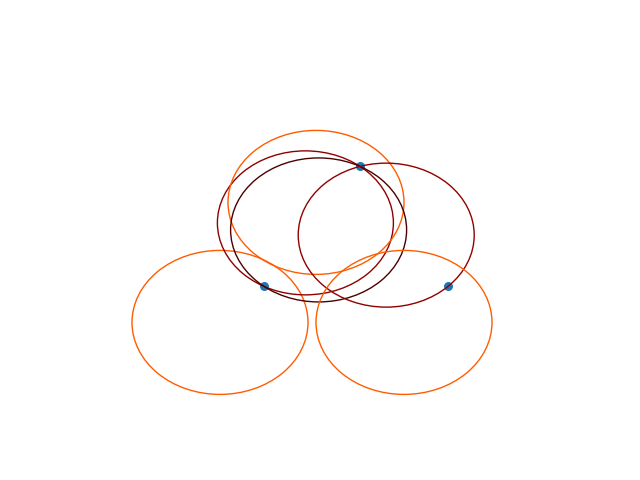

[(0.2989711013608711, 0.0, 0.0, 1.0), (0.5666370467761772, 0.0, 0.0, 1.0), (1.0, 0.359314099938117, 0.0, 1.0), (1.0, 1.0, 0.21249921249921258, 1.0)]
Cov: {0}
Point(x=-0.75, y=-0.45)
Cov: {0, 1}
Point(x=0.317500117856886, y=0.7941817550650723)
Cov: {1}
Point(x=0.44999999999999996, y=1.05)
Cov: {0, 1, 2}
Point(x=0.4824998821431141, y=0.7058182449349277)
Cov: {1, 2}
Point(x=1.3276756770500275, y=0.64085896873365)
Cov: {2}
Point(x=1.55, y=-0.45)


In [146]:
plt.figure(2)
ax2=plt.gca()
pell_mce1(ax2)
ppoints(ax2)
plt.savefig("e2mwc4.pdf")
plt.show()

<IPython.core.display.Javascript object>


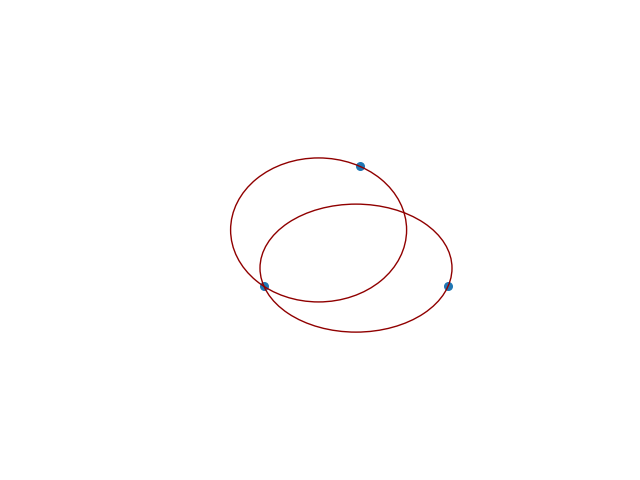

In [155]:
p2=Point(x=0.4824998821431141, y=0.7058182449349277)
p1=Point(x=0.95, y=0.22852182001336804)
plt.figure(3)
ax2=plt.gca()
ppoints(ax2)
ax2.add_artist(mp.patches.Ellipse([p1.x, p1.y], E1.a * 2, E1.b * 2, fill=False, color=colors[1]))
ax2.add_artist(mp.patches.Ellipse([p2.x, p2.y], E2.a * 2, E2.b * 2, fill=False, color=colors[1]))
plt.savefig("emopt.pdf")
plt.show()

# markdown test
$q = \frac{a^2}{b^2}$

<IPython.core.display.Javascript object>


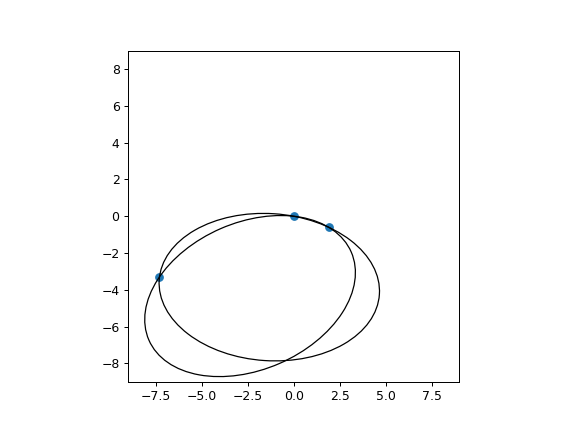

time in s: 0.06985664367675781


In [2]:
import time

t1 = time.time()

f = np.vectorize(poly_function)

a = 6
b = 4

X = np.random.rand(2) * 5
Y = np.random.rand(2) * 5
X = [0, 1.9000000000000004, -7.3]
Y = [0, -0.6000000000000014, -3.3000000000000043]
x1 = X[1]
x2 = X[2]
y1 = Y[1]
y2 = Y[2]

#x1, y1 = 1.4, 0
#x2, y2 = 0.352 + 0.7, -0.81


def cercle_circonscrit(x1, y1, x2, y2, x3, y3):
    #(x1, y1), (x2, y2), (x3, y3) = T
    A = np.array([[x3-x1,y3-y1],[x3-x2,y3-y2]])
    Y = np.array([(x3**2 + y3**2 - x1**2 - y1**2),(x3**2+y3**2 - x2**2-y2**2)])
    if np.linalg.det(A) == 0:
        return False
    Ainv = np.linalg.inv(A)
    X = 0.5*np.dot(Ainv,Y)
    x,y = X[0],X[1]
    r = sqrt((x-x1)**2+(y-y1)**2)
    return (x,y),r

def tr(theta, q, x, y):
    return q*(x*cos(theta) + y*sin(theta)), -x * sin(theta) + y * cos(theta)

def tri(theta, q, x, y):
    x = x/q
    return (x*cos(-theta) + y*sin(-theta)), -x * sin(-theta) + y * cos(-theta)


fig = plt.figure()
ax = fig.add_subplot(111, aspect='equal')
ax.scatter([0, x1, x2], [0, y1, y2])
ax.set_xlim(-9, 9)
ax.set_ylim(-9, 9)

def chk(theta, xc, yc, x, y):
    X=x-xc
    Y=y-yc
    #print("eee", (X*cos(theta) + Y*sin(theta))**2/a**2 + (X*sin(theta) - Y*cos(theta))**2/b**2)
    return (X*cos(theta) + Y*sin(theta))**2/a**2 + (X*sin(theta) - Y*cos(theta))**2/b**2 - 1e-9 < 1

roo = e3pnt(a, b, [0, x1, x2], [0, y1, y2])

for r in roo:
    
    xc, yc, theta = r
    
    ax.add_artist(mp.patches.Ellipse([xc, yc], a * 2, b * 2, fill=False, angle=theta/pi * 180))

    #ax.add_artist(mp.patches.Ellipse([xc, yc], a * 2, b * 2, fill=False, angle=-theta/pi * 180))
    
print(f"time in s: {time.time()-t1}")
#fig.savefig('e3pnt.jpg')
    
    